В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_id = '17Rcan7n4c4ZRXOWaKawm8t_NDY5o85Dj'
url = f'https://drive.google.com/uc?id={file_id}'

medical_df = pd.read_csv(url)
non_smoker_df = medical_df[medical_df.smoker == 'no']
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values
X_matrix = np.stack([np.ones(len(X)), X], axis=1)
print(X_matrix.shape)
print(X_matrix[:5])

(1064, 2)
[[ 1. 18.]
 [ 1. 28.]
 [ 1. 33.]
 [ 1. 32.]
 [ 1. 31.]]


In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [6]:
theta_mnk = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ y)

predictions_mnk = X_matrix @ theta_mnk
rmse_mnk = rmse(y, predictions_mnk)

print(f"МНК Коефіцієнти: {theta_mnk[0]:.2f}, {theta_mnk[1]:.2f}")
print(f"МНК RMSE: {rmse_mnk:.2f}")

МНК Коефіцієнти: -2091.42, 267.25
МНК RMSE: 4662.51


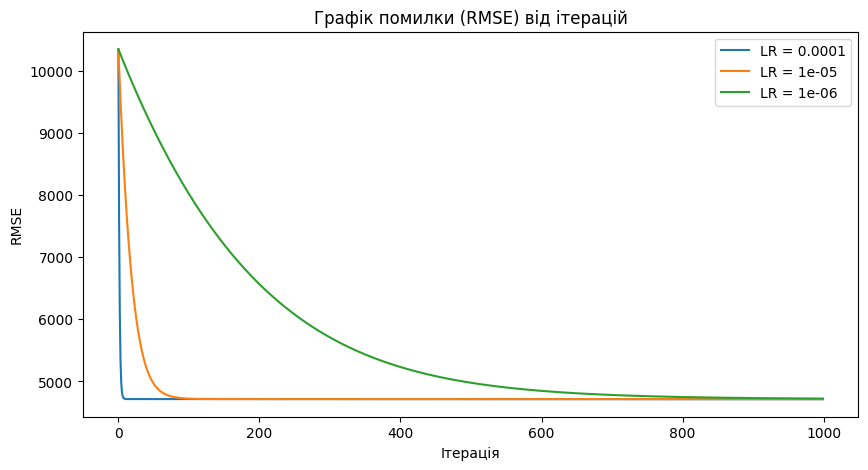

In [10]:
def gradient_descent(X, y, lr, iterations):
    n = len(y)
    theta = np.zeros(X.shape[1])
    history = []

    for i in range(iterations):
        predictions = X @ theta
        error = predictions - y
        gradient = (2/n) * (X.T @ error)
        theta = theta - lr * gradient
        history.append(rmse(y, predictions))

    return theta, history

rates = [0.0001, 0.00001, 0.000001]
iterations = 1000
results_gd = {}

plt.figure(figsize=(10, 5))

for lr in rates:
    theta_gd, history = gradient_descent(X_matrix, y, lr, iterations)
    results_gd[lr] = (theta_gd, history)
    plt.plot(history, label=f'LR = {lr}')

plt.title('Графік помилки (RMSE) від ітерацій')
plt.xlabel('Ітерація')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [20]:
best_lr = 0.0001
theta_gd_best = results_gd[best_lr][0]
predictions_gd = X_matrix @ theta_gd_best
rmse_gd = rmse(y, predictions_gd)
print(f"МНК Коефіцієнти: {theta_gd_best[0]:.2f}, {theta_gd_best[1]:.2f}")
print(f"МНК RMSE: {rmse_gd:.2f}")

МНК Коефіцієнти: -41.98, 221.10
МНК RMSE: 4713.25


In [21]:
from sklearn.linear_model import LinearRegression

X_sklearn = non_smoker_df[['age']]
model = LinearRegression()
model.fit(X_sklearn, y)
predictions_sk = model.predict(X_sklearn)
rmse_sklearn = rmse(y, predictions_sk)
print(f"Sklearn Коефіцієнти: {model.intercept_:.2f}, {model.coef_[0]:.2f}")
print(f"Sklearn RMSE: {rmse_sklearn:.2f}")

Sklearn Коефіцієнти: -2091.42, 267.25
Sklearn RMSE: 4662.51


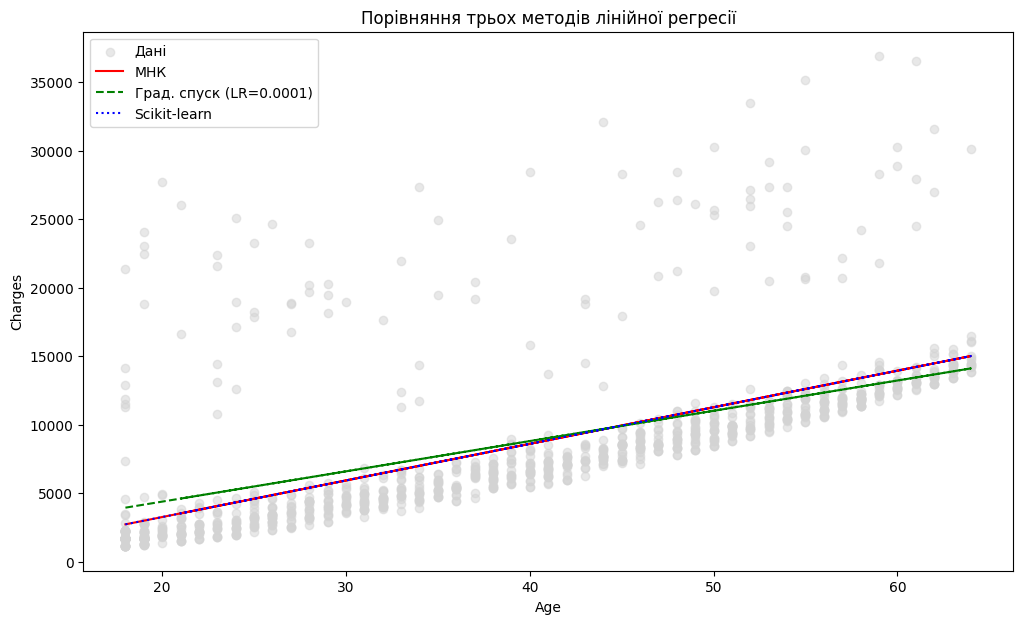

In [24]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='lightgray', alpha=0.5, label='Дані')

plt.plot(X, predictions_mnk, color='red', label='МНК')
plt.plot(X, predictions_gd, color='green', linestyle='--', label=f'Град. спуск (LR=0.0001)')
plt.plot(X, predictions_sk, color='blue', linestyle=':', label='Scikit-learn')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Порівняння трьох методів лінійної регресії')
plt.legend()
plt.show()

Параметри МНК та Scikit-learn ідентичні. Градієнтний спуск показує трохи гірший результат. Знайдені в ручну параметри відрізняються, хоча схожі на МНК та Scikit-learn.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [29]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X = smoker_df[['age']]
y = smoker_df['charges']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
rmse_smokers = rmse(y, predictions)

print(f"Коефіцієнти: {model.intercept_:.2f}, {model.coef_[0]:.2f}")
print(f"Точність моделі (RMSE): {rmse_smokers:.2f}")

Коефіцієнти: 20294.13, 305.24
Точність моделі (RMSE): 10711.00


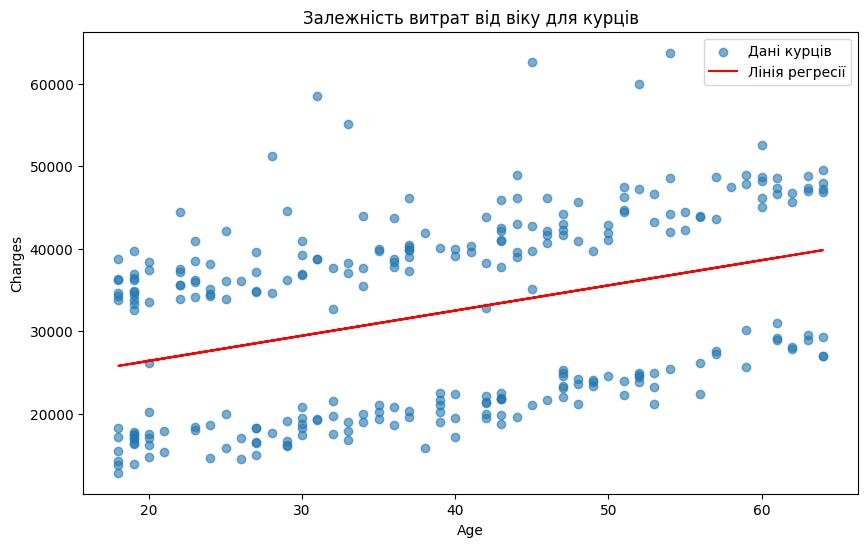

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(smoker_df.age, smoker_df.charges, alpha=0.6, label='Дані курців')
plt.plot(smoker_df.age, predictions, color='red', label='Лінія регресії')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Залежність витрат від віку для курців')
plt.legend()
plt.show()

Я б не рекомендував використовувати цю модель у компанії в такому вигляді. Хоча вона показує загальний тренд зростання ціни з віком, похибка у 10711 є дуже великою для фінансів. Для покращення моделі необхідно додати інші ознаки.